In [872]:
import requests
import pandas as pd 
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure
import squarify 
import numpy as np
import circlify

In [873]:
# Open dataset
with open("mtg_dataset.json", "r") as myfile:
    mtg_dataset = json.load(myfile)

In [874]:
# Dataset visualization 
df=pd.DataFrame(mtg_dataset['cards'])
df

,name,manaCost,cmc,colors,colorIdentity,type,supertypes,types,subtypes,rarity,...,foreignNames,printings,originalText,originalType,legalities,id,variations,loyalty,hand,life
0,"Zimone, Quandrix Prodigy",{G}{U},2.0,"[Green, Blue]","[G, U]",Legendary Creature — Human Wizard,[Legendary],[Creature],"[Human, Wizard]",Uncommon,...,"[{'name': 'Zimone, Quandrix-Genie', 'text': '{...",[STX],"{1}, {T}: You may put a land card from your ha...",Legendary Creature — Human Wizard,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",f4c002ad-63fd-55e2-b256-59c3e3a61156,NaN,NaN,NaN,NaN
1,Chariot of Victory,{3},3.0,NaN,NaN,Artifact — Equipment,NaN,[Artifact],[Equipment],Uncommon,...,"[{'name': 'Streitwagen des Sieges', 'text': 'D...",[JOU],"Equipped creature has first strike, trample, a...",Artifact — Equipment,"[{'format': 'Commander', 'legality': 'Legal'},...",59ce28fa-099b-567f-be43-84927a2f2a24,NaN,NaN,NaN,NaN
2,Soltari Foot Soldier,{W},1.0,[White],[W],Creature — Soltari Soldier,NaN,[Creature],"[Soltari, Soldier]",Common,...,"[{'name': 'Soltarischer Fußsoldat', 'text': 'I...","[BRB, TMP]",Shadow (This creature can block or be blocked ...,Summon - Soldier,"[{'format': 'Commander', 'legality': 'Legal'},...",ed8b0bc5-9da3-503d-a5f9-bedadc07a2e0,NaN,NaN,NaN,NaN
3,Forest,NaN,0.0,NaN,[G],Basic Land — Forest,[Basic],[Land],[Forest],Common,...,"[{'name': 'Wald', 'type': 'Standardland — Wald...","[10E, 2ED, 2XM, 3ED, 4BB, 4ED, 5ED, 6ED, 7ED, ...",G,Basic Land — Forest,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",5baae215-7801-5a5d-bcb4-3828dc17ba2f,"[a4d70bd0-068d-5507-8a23-bc3903e6adc4, 0b8caa5...",NaN,NaN,NaN
4,"Eloise, Nephalia Sleuth",{3}{U}{B},5.0,"[Black, Blue]","[B, U]",Legendary Creature — Human Rogue,[Legendary],[Creature],"[Human, Rogue]",Mythic,...,"[{'name': 'Eloise, Ermittlerin aus Nefalen', '...",[MIC],"Whenever another creature you control dies, in...",Legendary Creature — Human Rogue,"[{'format': 'Commander', 'legality': 'Legal'},...",3ed2467b-a95c-55a8-b168-0201df48a9d4,[1c6ef113-b374-5291-9fb7-98784323dedf],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sungrass Egg,{1},1.0,NaN,"[G, W]",Artifact,NaN,[Artifact],NaN,Uncommon,...,"[{'name': 'Sonnengras-Ei', 'text': '{2}, {T}, ...",[ODY],"o2, ocT, Sacrifice Sungrass Egg: Add oGoW to y...",Artifact,"[{'format': 'Commander', 'legality': 'Legal'},...",18d6f03c-6510-59ae-b9c8-f2b97c89bffd,NaN,NaN,NaN,NaN
9996,Gobhobbler Rats,{B}{R},2.0,"[Black, Red]","[B, R]",Creature — Rat,NaN,[Creature],[Rat],Common,...,"[{'name': 'Plattschnauzen-Ratten', 'text': 'Ve...",[DIS],"Hellbent Gobhobbler Rats gets +1/+0 and has ""{...",Creature - Rat,"[{'format': 'Commander', 'legality': 'Legal'},...",90ade948-99e0-57c0-a084-3c19a7843b7f,NaN,NaN,NaN,NaN
9997,Shielded Passage,{W},1.0,[White],[W],Instant,NaN,[Instant],NaN,Common,...,"[{'name': 'Beschützter Durchgang', 'text': 'Ve...",[GTC],Prevent all damage that would be dealt to targ...,Instant,"[{'format': 'Commander', 'legality': 'Legal'},...",236594f4-c099-54c0-8107-08388ccb8d55,NaN,NaN,NaN,NaN
9998,"Akroma, Angel of Wrath Avatar",NaN,0.0,NaN,NaN,Vanguard,NaN,[Vanguard],NaN,Rare,...,NaN,[PMOA],Whenever a creature enters the battlefield und...,Vanguard,NaN,b1fc2762-92aa-5a14-8509-a59cb611e376,NaN,NaN,+1,+7


In [875]:
# Inspect rarity column 
df['rarity'].value_counts()

Common      3397
Rare        3065
Uncommon    2928
Mythic       558
Special       51
Bonus          1
Name: rarity, dtype: int64

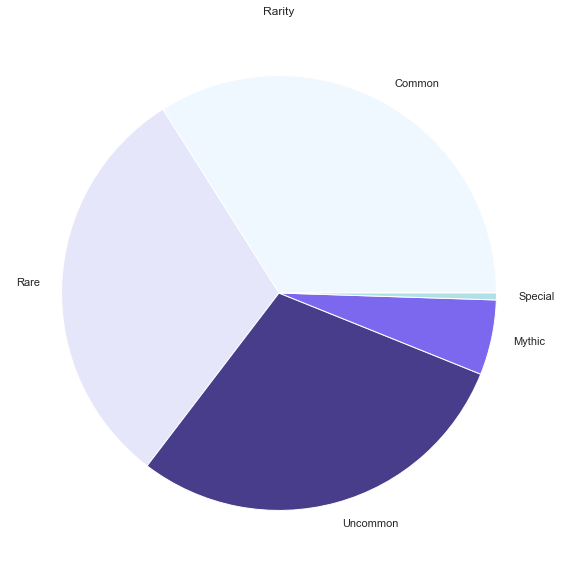

In [876]:
#CIRCLE CHART
rarity = ['Common', 'Rare', 'Uncommon', 'Mythic', 'Special'] 
data = [3397,3065,2928,558,51]
#Creating the pie chart
plt.figure(figsize=(20,10))
plt.pie(data, labels = rarity,colors = ['#F0F8FF','#E6E6FA','#483D8B','#7B68EE','#B0E0E6'])
#Adding the aesthetics
plt.title('Rarity')
#Show the plot
plt.show()

<AxesSubplot:xlabel='count', ylabel='rarity'>

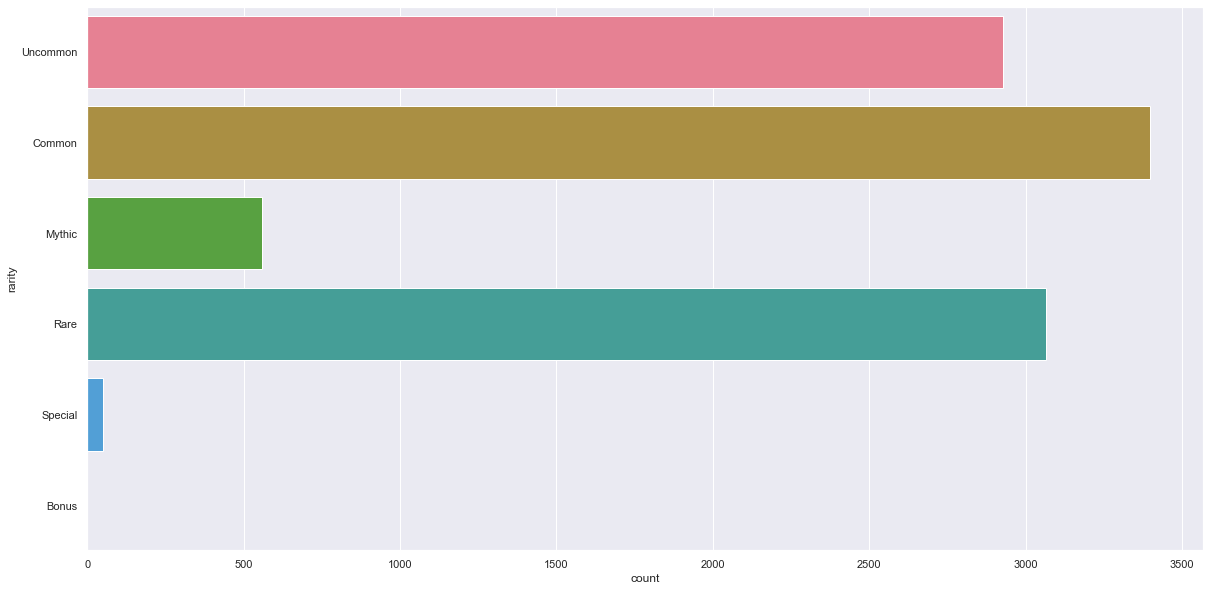

In [877]:
plt.figure(figsize=(20,10))
sns.countplot(y="rarity", data=df, palette="husl")

In [878]:
# Cmc size
x=df.groupby(by=["cmc"],as_index=False).size()
cmc_tolist = x["cmc"].tolist()
size_tolist=x["size"].tolist()

In [879]:
cmc_tolist = [str(int(x)) for x in cmc_tolist]

<BarContainer object of 16 artists>

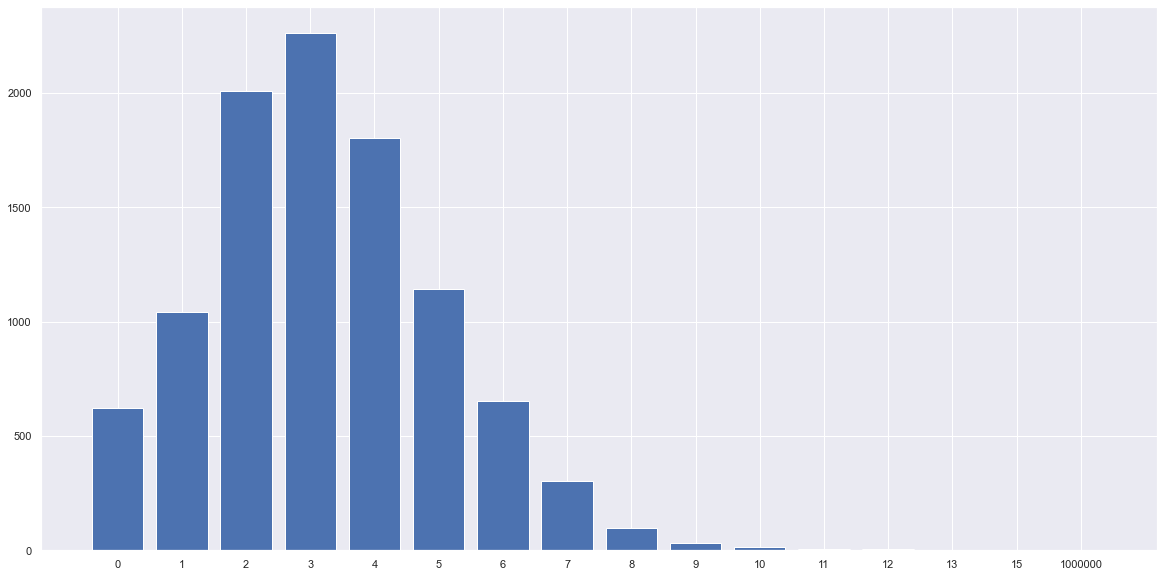

In [880]:
# cmc histogram
plt.figure(figsize=(20,10))
plt.bar(cmc_tolist,size_tolist)


In [881]:
# Create a list to count the occurrences of a color

mylist = df[df.colors.notnull()]["colors"].tolist()
mycolors = ["Red", "White", "Blue", "Black", "Green"]
numcolors = [0 for x in range(5)]

for el in mylist:        
    for colors in el:
        id = mycolors.index(colors)
        numcolors[id]+=1

        


(1750.0, 2050.0)

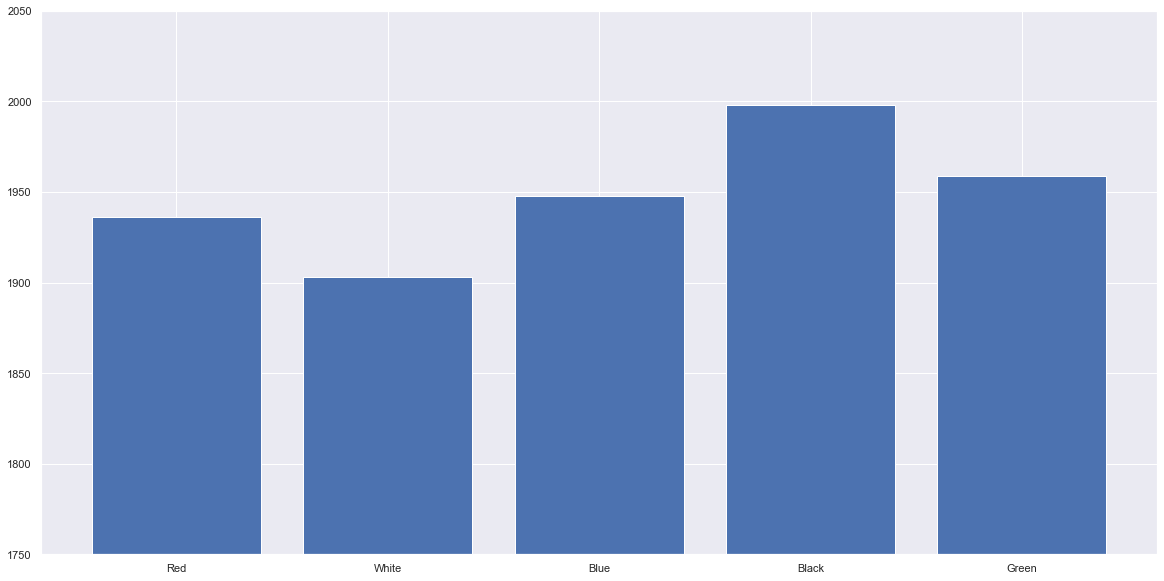

In [882]:
#Plot each color in a histogram
plt.figure(figsize=(20,10)) 
plt.bar(mycolors, numcolors)
ax = plt.gca()
ax.set_ylim([1750, 2050])

In [883]:
# Artists who have drawn more cards 
artist_size = df.groupby(by=["artist"],as_index=False).size()
artist_size= artist_size.sort_values(by=['size'],ascending=False)
artist_size = artist_size.head(20)
artist = artist_size["artist"].tolist()
size = artist_size["size"].tolist()

<BarContainer object of 20 artists>

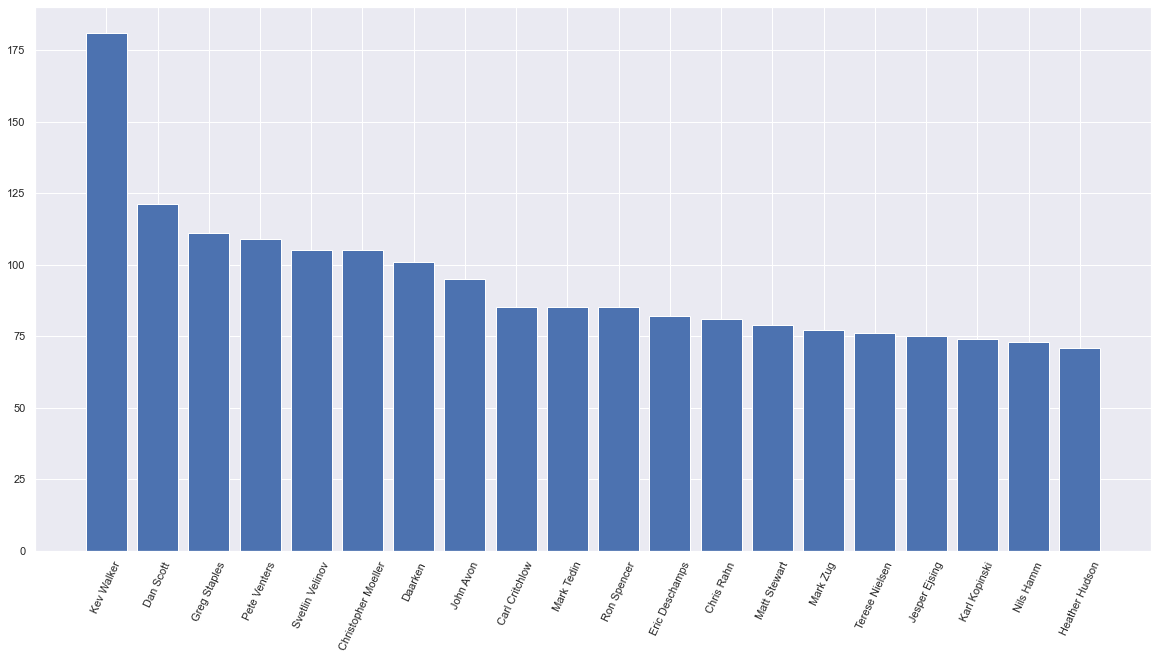

In [884]:
# Plot the artists in a histogram, where in x-axis there are the names while on the y-axis the number of cards
plt.figure(figsize=(20,10))
plt.xticks(rotation=65)
plt.bar(artist,size)

In [885]:
# Deletion of texts containing na values 
df = df[df['text'].notna()]

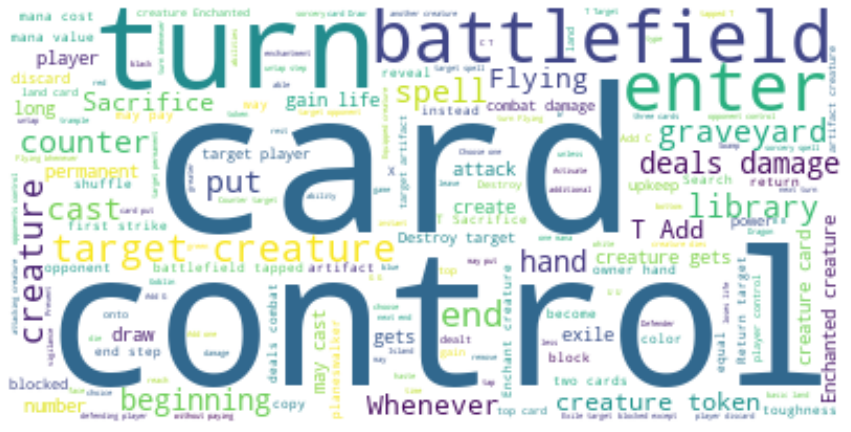

In [886]:
text = " ".join(text_all for text_all in df.text)

stopwords=set(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [887]:
#average cmc based on power 
cmc_power = df.groupby(by=["power"],as_index=False).mean()

#drop the last two rows cause they can lead to an error, since there was a power of ∞ and ?.
cmc_power.drop(cmc_power.tail(2).index,inplace=True)
cmc_av = cmc_power["cmc"].tolist()

#create a list containing the different types
types = df["types"].value_counts().index.tolist()

#new data frame with only cmc_av
newdf= pd.DataFrame(cmc_av,columns=["cmc_av"])

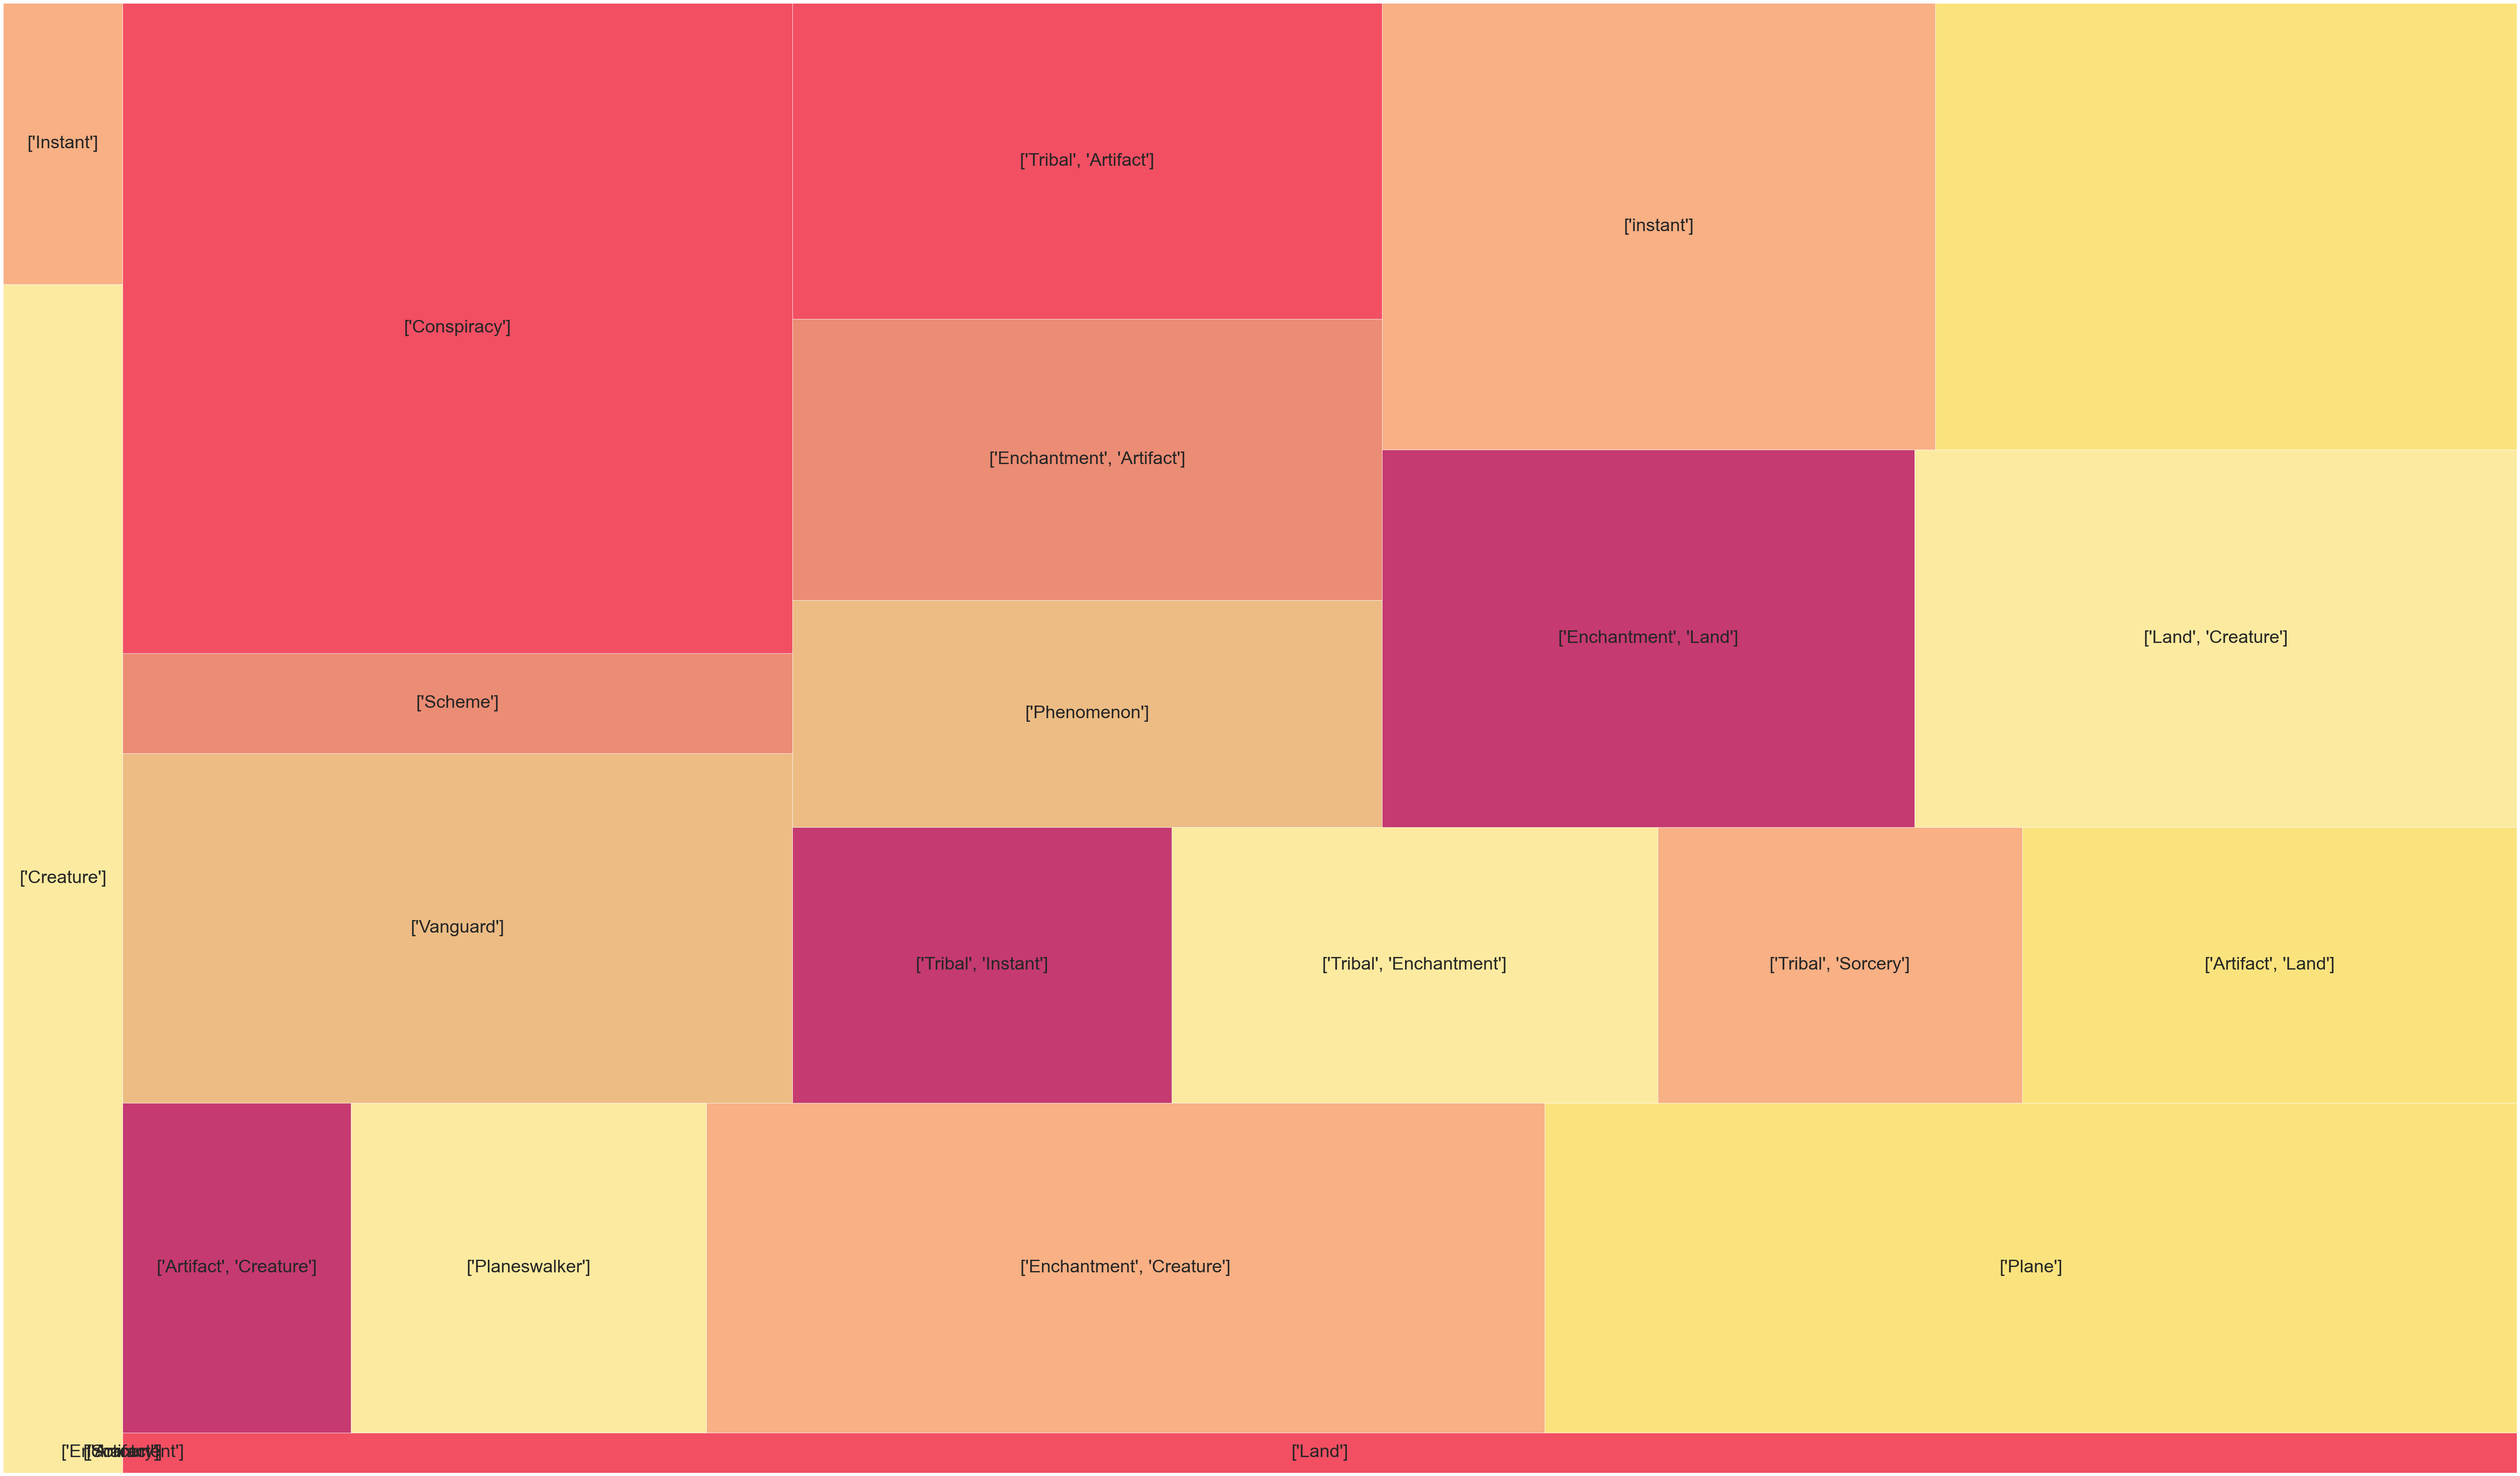

In [888]:
# Avoid float division by zero error
cmc_av= (newdf.cmc_av).apply(lambda x: x + 0.000001)
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
# Plot the Treemap
plt.figure(figsize=(100,60))
squarify.plot(sizes= cmc_av, label= types, color= colors, alpha=.8, text_kwargs={'fontsize':40})
plt.axis('off')
plt.show()

In [889]:
# Insepcting the number of variations per card 
var = df.groupby(by=["number"],as_index=False)["variations"].count()

# Sort by the twenty cards that have undergone the most changes
var = var.sort_values(by="variations", ascending = False)
var = var.head(20)
numbers = var["number"].tolist()
var = var["variations"].tolist()

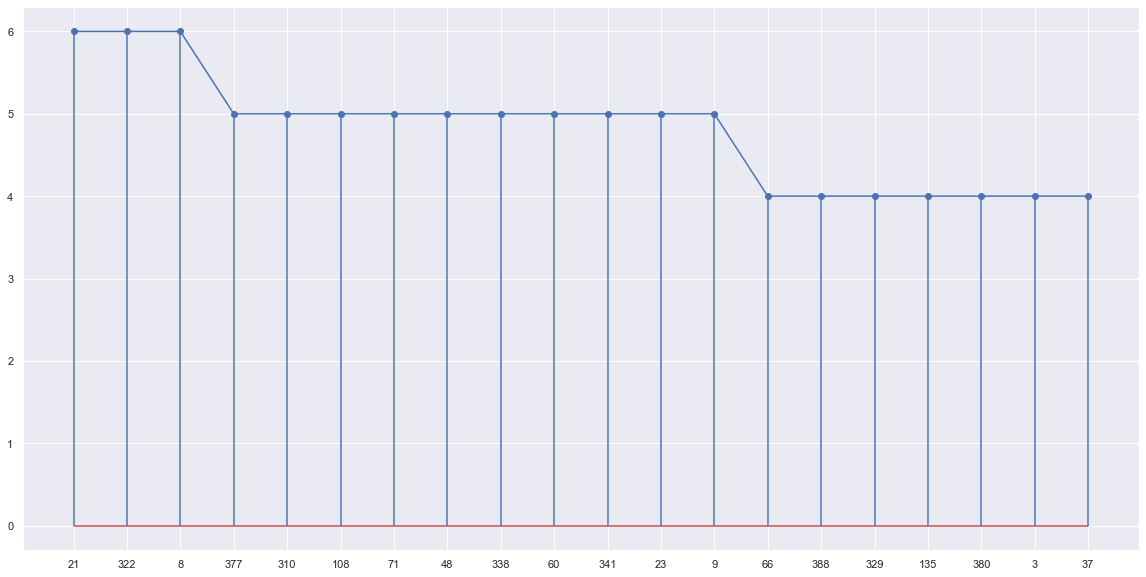

In [890]:
#Lollipop plot 
x = numbers
y = var
tickvalues = range(0,len(x)) 
plt.figure(figsize = (20,10))
plt.stem (var)
plt.xticks(ticks = tickvalues ,labels = x)
plt.plot(x,y)

In [891]:
# Number of cards per set 
num_cards = df.groupby(by=["set"],as_index=False)["number"].count()
num_cards = num_cards.sort_values(by="number",ascending=False)
num_cards = num_cards.head(100)
num_of_cards = num_cards["number"].tolist()
set_name = num_cards["set"].tolist()

<BarContainer object of 100 artists>

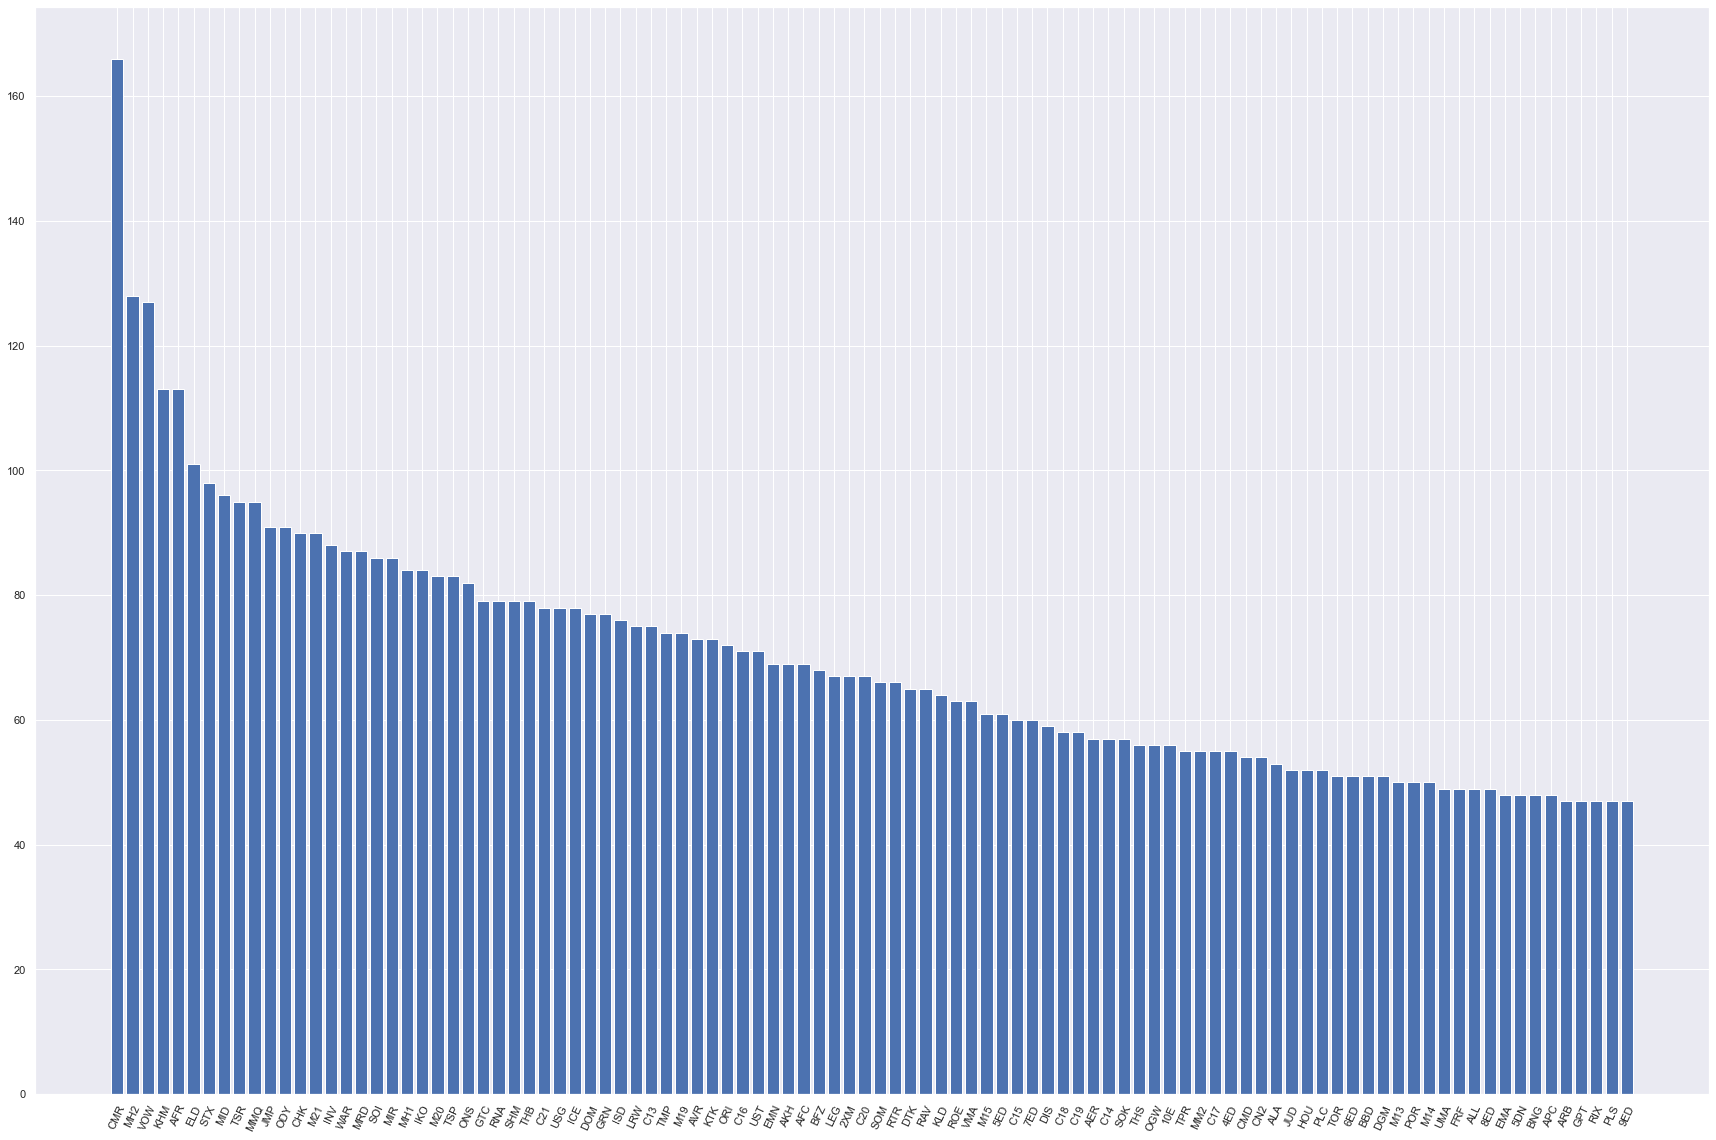

In [892]:
#Plot number of cards per set 
plt.figure(figsize=(30,20))
plt.xticks(rotation=65)
plt.bar(set_name,num_of_cards)

In [893]:
layouts = df["layout"].value_counts()
#drop the normal row for a better visualization, since normal layout are the most common
layouts= layouts.tail(layouts.shape[0] -1)
values = layouts.tolist()
names = layouts.index.tolist()

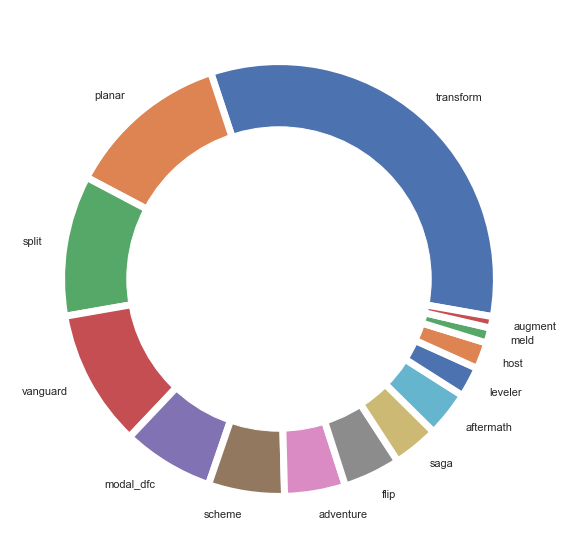

In [894]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(values, labels=names,labeldistance=1.10,startangle=-10, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
fig = plt.gcf()
fig.set_size_inches(10,10)


In [895]:
# Average mana cost per rarity
av_cmc= df.groupby(by=["rarity"],as_index=False).mean()
# Drop rare cause its cmc is too high for the visualization 
av_cmc.drop(index=df.index[3], 
        axis=0, 
        inplace=True)
# input data be positive and bonus is equal to zero
cmc_list = av_cmc["cmc"].apply(lambda x: x + 0.000001).tolist()
rarity_list= av_cmc["rarity"].value_counts().index.tolist()

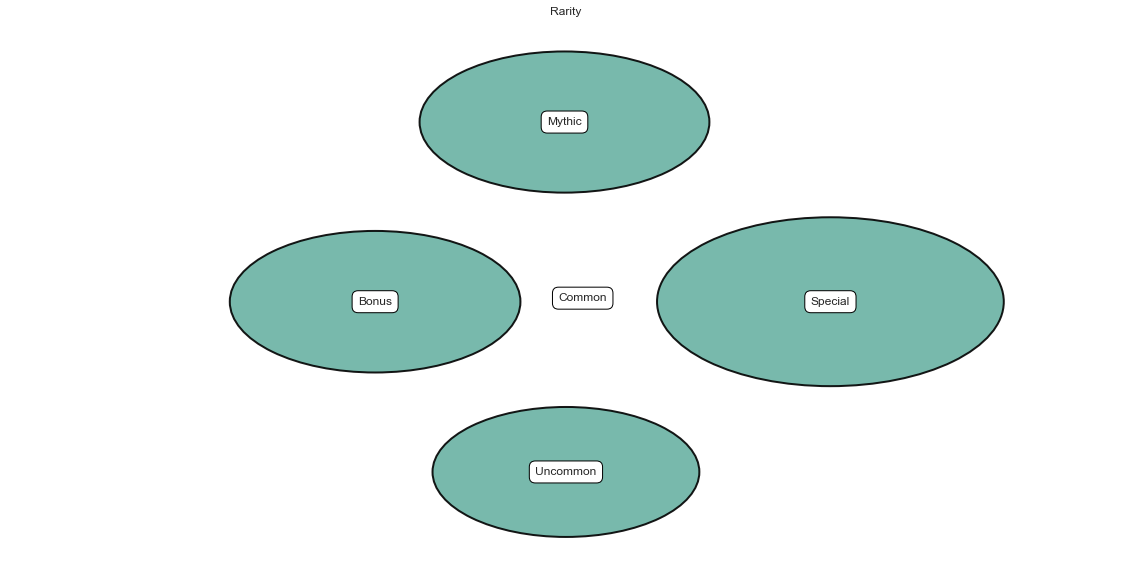

In [896]:
# compute circle positions:


circles = circlify.circlify(
 cmc_list, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(20,10))

# Title
ax.set_title('Rarity')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels= rarity_list
labels = labels

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2, facecolor="#69b2a3", edgecolor="black"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
